# Free Particle Motion

In this short notebook we will look at a free particle moving between two points in space and time. We will show that the direct path between the points is the one that minimizes the action

$$S = \int_{t_0}^{t_1} L(x, \dot{x}, t) dt$$

We will begin by importing some python packages to use and setting the font sizes for our plots.

In [1]:
import numpy as np # mathematical operations and functions
import matplotlib.pyplot as plt # for plotting
import matplotlib.cm as cm # for color bars on plots
import matplotlib.colors as colors

plt.rcParams['font.size'] = 15 # setting the font size

np.random.seed(42) # setting a random seed for reproducibility

Next we will define the mass of our particle, the limits of our space, the number of time steps to take and the time steps themselves.

In [2]:
m = 1.0 # mass of the particle
t0, t1 = 0.0, 1.0 # range in time
x0, x1 = 0.0, 1.0 # range in x coordinate
N = 100 # number of time steps
t = np.linspace(t0, t1, N) # N evenly spaced times between t0 and t1
dt = t[1] - t[0] # the step size

Now we will define our lagrangian which for a free particle in motion with no potential $V(x) = 0$ is given by

$$L = T = \frac{1}{2} m v^2.$$

We will also define a function to numerically calculate the action according too

$$S = \sum_i L(x, v) dt.$$

In [3]:
def L(x, v):
    """
    A function to calcualte the Lagrangian for a free particle.
    
    Parameters:

    x: the position of the particle at time t.
    v: the velocity of the particle at time t.
    """
    return 0.5 * m * v**2

def compute_action(x):
    """
    A function to numerically calculate the action.
    
    Parameters:
    
    x: the position of the particle at time t.

    """
    v = np.gradient(x, dt)
    return np.sum(L(x, v)) * dt

We can use the Euler-Lagrange equation derived in the lecture and lecture notes to work out the true path taken by our particle. Recall that the Euler-Lagrange equation is given by

$$\frac{d}{dt}\frac{\delta L}{\delta \dot{x}} - \frac{\delta L}{\delta x} = 0.$$

For our problem $L = \frac{1}{2} m v^2$ and so

$$\frac{d}{dt} (m \dot{x}) = 0$$

$$ m \ddot{x} = 0$$

$$ \ddot{x} = 0$$

using $v = \dot{x}$ and $a = \ddot{x}$. Solving this differential equation will give us the path taken by our particle

$$\ddot{x} = 0 \rightarrow \dot{x} = \mathrm{constant} = v_0$$

$$x = v_0 t + c.$$

Since we know that $x(t_0) = x_0$ and $x(t_1) = x_1$ then we can solve for $v_0 = \frac{x_1 - x_0}{t_1 - t_0}$ then $c$ is just the starting point $x_0$ and $t$ is the time since the start time i.e. $t - t_0$. So the true path taken by our particle is

$$x = \frac{x_1 - x_0}{t_1 - t_0} (t - t_0) + x_0$$



In [4]:
x_true = x0 + (x1 - x0)/(t1-t0) * (t - t0) # the true path taken by our particle

Now let us perturb our path and see how the action changes. We will add a sinusoidal perturbation to the true path given by

$$p = \epsilon \sin\bigg(\pi \frac{t - t_0}{t_1 - t_0}\bigg)$$

In [5]:
# Trial paths: perturbations
epsilons = np.random.uniform(-1, 1, 100) # random magnitudes for our perturbation
actions, trials = [], []
for eps in epsilons: # loop through the 100 random perturbation magnitudes
    perturbation = eps * np.sin(np.pi * (t - t0) / (t1 - t0)) # the perturbation for each magnitude epsilon
    x_trial = x_true + perturbation # add the perturbation to the true path
    S = compute_action(x_trial) # calculate the action
    actions.append(S) # make a list of actions
    trials.append(x_trial) # make a list of paths

# convenient way to keep the list to find the minimum and maximum
# for color bars on plots
actions = np.array(actions)

And finally we will visualize how the action varies when we move away from the true path of the particle.

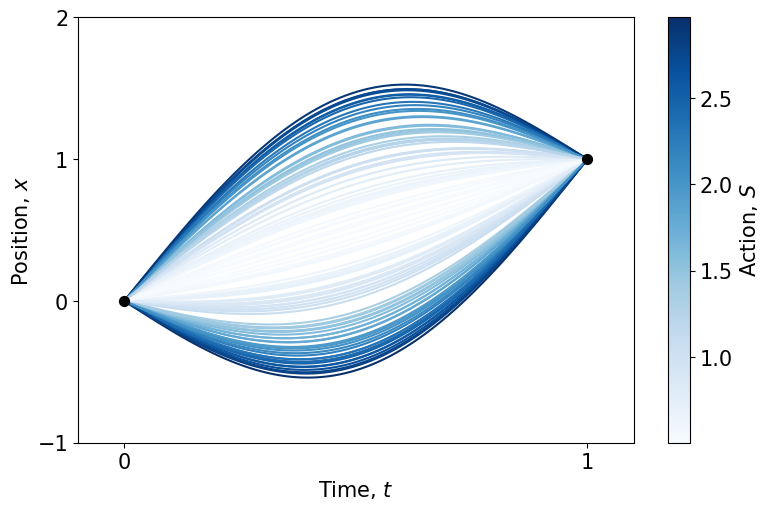

In [18]:
# define the color bar
norm = colors.Normalize(vmin=actions.min(), vmax=actions.max())
cmap = plt.get_cmap('Blues')
sm = cm.ScalarMappable(norm=norm, cmap=cmap)

fig, axes = plt.subplots(1, 1, figsize=(8, 5))
for i in range(len(trials)):
    # plot each trial and color according to its action
    axes.plot(t, trials[i],
        color=sm.to_rgba(actions[i]))
# plot the true path taken by the particle
#plt.plot(t, x_true, c='r', ls='--', linewidth=2, label="True path")
plt.scatter([0, 1], [0, 1], c='k', s=50, label="Endpoints", zorder=10)
# make the plot look nice
plt.colorbar(sm, label=r'Action, $S$', ax=axes)
plt.tight_layout()
plt.xlabel(r'Time, $t$')
plt.ylabel(r'Position, $x$')
plt.xlim([-0.1, 1.1])
plt.ylim([-1, 2])
plt.xticks([0.0, 1.0])
plt.yticks([-1, 0, 1, 2])
plt.savefig("trial_paths_no_true_path.png", dpi=300)